In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


In [2]:
# Loading the Dataset
df=pd.read_csv('Invistico_Airline.csv')

print(df.shape)

###Checking the total number of null values
df.isnull().sum()

(129880, 23)


satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [3]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: >

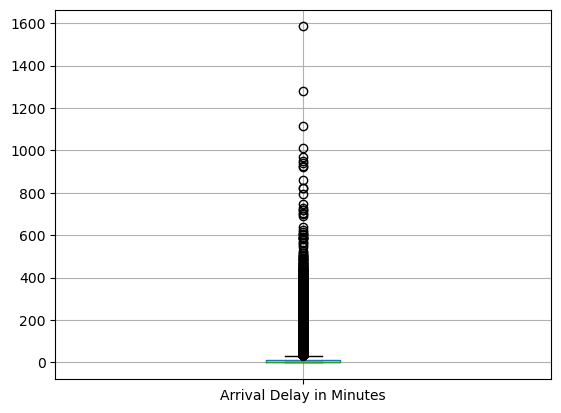

In [4]:
df.boxplot(column='Arrival Delay in Minutes',by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None)

In [5]:

# Fill missing values in the 'Arrival Delay in Minutes' column with the column's mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
print(df.isnull().sum())
df.head()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
#Converting `oceanProximity` to a Boolean Variable
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel'],drop_first=True)
df.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,Eco,265,0,0,0,2,2,4,...,0,3,5,3,2,0,0.0,False,False,True
1,1,47,Business,2464,0,0,0,3,0,2,...,4,4,2,3,2,310,305.0,True,False,True
2,1,15,Eco,2138,0,0,0,3,2,0,...,3,4,4,4,2,0,0.0,False,False,True
3,1,60,Eco,623,0,0,0,3,3,4,...,0,1,4,1,3,0,0.0,False,False,True
4,1,70,Eco,354,0,0,0,3,4,3,...,0,2,4,2,5,0,0.0,False,False,True


In [8]:
df = pd.get_dummies(df, columns=['Class'],drop_first=False).astype(int)
df = df.drop(columns=['Class_Eco'])
df.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0,0,0,1,0,0
1,1,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305,1,0,1,1,0
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0,0,0,1,0,0
3,1,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0,0,0,1,0,0
4,1,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0,0,0,1,0,0


In [9]:
#Scaling Data
X = df.drop(columns=['satisfaction'])
X_scaled=StandardScaler().fit_transform(X)
scaled_X=pd.DataFrame(X_scaled,columns=X.columns)

#Train-Test Splitting
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)
scaled_X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco Plus
0,1.691351,-1.671103,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,...,1.316217,-0.612761,-1.041485,-0.386481,-0.392917,-0.985340,-0.473422,1.493951,-0.958070,-0.279499
1,0.500820,0.469852,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,...,-1.063645,-0.612761,-1.041485,7.756204,7.548290,1.014878,-0.473422,1.493951,1.043766,-0.279499
2,-1.615680,0.152458,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,...,0.522929,0.255469,-1.041485,-0.386481,-0.392917,-0.985340,-0.473422,1.493951,-0.958070,-0.279499
3,1.360648,-1.322552,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,...,0.522929,-2.349219,-0.271490,-0.386481,-0.392917,-0.985340,-0.473422,1.493951,-0.958070,-0.279499
4,2.022054,-1.584452,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,...,0.522929,-1.480990,1.268500,-0.386481,-0.392917,-0.985340,-0.473422,1.493951,-0.958070,-0.279499


In [10]:
#Train the Linear Probability Model (LPM):
lpm_model = LinearRegression()
lpm_model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Predicting on the Test Set
y_pred_prob_lpm = lpm_model.predict(X_test)
y_pred_class_lpm = (y_pred_prob_lpm > 0.5).astype(int)

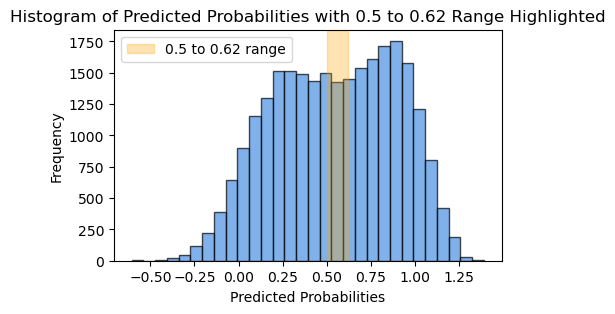

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Convert y_pred_prob_lpm to a NumPy array if it’s not already
y_pred_prob_lpm = np.array(y_pred_prob_lpm)

# Plot the histogram
plt.figure(figsize=(5,3))
plt.hist(y_pred_prob_lpm, bins=30, color='#4A90E2', edgecolor='black', alpha=0.7)

# Highlight the 0.5 to 0.62 range by adding a shaded area
plt.axvspan(0.5, 0.62, color='orange', alpha=0.3, label='0.5 to 0.62 range')

# Add labels and title
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities with 0.5 to 0.62 Range Highlighted")
plt.legend()

# Show the plot
plt.show()


In [ ]:
#Reporting Accuracy
accuracy_lpm = accuracy_score(y_test, y_pred_class_lpm)
print(f'Linear Probability Model Accuracy: {accuracy_lpm}')

In [ ]:
df = df.reset_index(drop=True)  # Reset index of the original DataFrame
y_pred_class_lpm = pd.Series(y_pred_class_lpm).reset_index(drop=True)  # Reset index of the predictions
df['Pred'] = y_pred_class_lpm 
df.head()

In [ ]:
df = df.reset_index(drop=True)  # Reset index of the original DataFrame
y_pred_prob_lpm = pd.Series(y_pred_prob_lpm).reset_index(drop=True)  # Reset index of the predictions
df['Prediction'] = y_pred_prob_lpm  # Add the predictions as a new column
median=df['Prediction'].median()
max=df['Prediction'].max()
min=df['Prediction'].min()
print(median, max, min)
df.head()

In [ ]:
import numpy as np

# Limit prediction_data to the first 129,880 rows of the "Prediction" column
prediction_data = df['Prediction'].iloc[:129880]

# Calculate details for the boxplot of the "Prediction" column

# Quartiles and median
Q1 = np.percentile(prediction_data.dropna(), 25)  # Drop NaN values before calculating percentiles
Q3 = np.percentile(prediction_data.dropna(), 75)
median = np.median(prediction_data.dropna())

lower_10_percentile = np.percentile(prediction_data[prediction_data < median], 90)  # Bottom 10% below median
upper_10_percentile = np.percentile(prediction_data[prediction_data > median], 10)  # Top 10% above median


# Interquartile Range (IQR)
IQR = Q3 - Q1

# Whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Outliers
outliers = prediction_data[(prediction_data < lower_whisker) | (prediction_data > upper_whisker)]


# Print the details
print(f"25th Percentile (Q1): {Q1}")
print(f"Median (Q2): {median}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")
print(f"Outliers:\n{outliers}")


print(f"10% Below Median Threshold: {lower_10_percentile}")
print(f"10% Above Median Threshold: {upper_10_percentile}")


df.boxplot(column='Prediction',by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None)

In [ ]:
sns.histplot(y_pred_prob_lpm)

In [ ]:
#Reporting Coefficients
coefficients_lpm = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lpm_model.coef_})
print("\nLinear Probability Model Coefficients:")
coefficients_lpm

In [ ]:
#Training the Logistic Regression Model
logistic_model = LogisticRegression(penalty=None)
logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred)
print(f'Basic Logistic Regression Accuracy: {accuracy_logistic}')

In [ ]:
#Predicting on the Test Set
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_class_logistic = (y_pred_prob_logistic > 0.5).astype(int)

In [ ]:
#Reporting Accuracy:
accuracy_logistic = accuracy_score(y_test, y_pred_class_logistic)
print(f'Basic Logistic Regression Accuracy: {accuracy_logistic}')

In [ ]:
# Reporting Coefficients
coefficients_logistic = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logistic_model.coef_[0]})
print("\nBasic Logistic Regression Coefficients:")
coefficients_logistic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `coefficients_logistic` is a DataFrame with 'Feature' and 'Coefficient' columns

# Sort coefficients in descending order to identify the most positive and most negative coefficients
sorted_features = coefficients_logistic.sort_values(by='Coefficient', ascending=False)

# Select the most positive and most negative feature
top_positive_feature = sorted_features.head(1)
top_negative_feature = sorted_features.tail(1)

# Combine the top positive and negative feature for highlighting
top_2_features = pd.concat([top_positive_feature, top_negative_feature])

# Plot all features with emphasis on the top positive and negative feature
plt.figure(figsize=(7, 5))
plt.barh(sorted_features['Feature'], sorted_features['Coefficient'], color='gray')  # Plot all features in gray

# Highlight only the top positive and top negative feature
plt.barh(top_2_features['Feature'], top_2_features['Coefficient'], color='orange')

plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Coefficients with Top Positive and Negative Highlighted")
plt.show()
